In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n = 200
df = pd.DataFrame({
    'date': pd.date_range('2022-01-01', periods=n, freq='D'),
    'gender': np.random.choice(['Male','Female'], size=n),
    'age': np.random.normal(35, 10, size=n).clip(18, 65).round(1),
    'salary': np.random.lognormal(mean=10, sigma=0.4, size=n).round(2),
    'visits': np.random.poisson(lam=4, size=n),
})

# Save the dataframe as CSV
df.to_csv('D:/bootcamp_Jinay_Jain/homework/homework9/data/synthetic_customer_data.csv', index=False)

print("Synthetic data saved")

# Target variable: expenditure
base = df['salary']*0.002 + df['visits']*15 + np.random.normal(0, 50, size=n)
df['expenditure'] = np.maximum(0, base).round(2)

Synthetic data saved


feature 1: spend to salary ratio

In [13]:
df['spend_salary_ratio'] = df['expenditure'] / df['salary']


 Rationale for Feature 1
- This ratio captures how much of a person's salary is being spent. 
- It standardizes expenditure relative to income, which can highlight high-spending individuals regardless of salary.


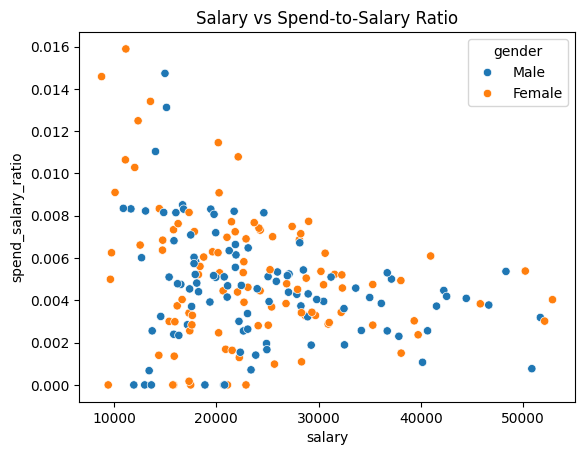

In [14]:
sns.scatterplot(data=df, x='salary', y='spend_salary_ratio', hue='gender')
plt.title('Salary vs Spend-to-Salary Ratio')
plt.show()

Feature 2: Age Group

In [15]:
# Categorize age: Young (18-30), Mid (31-50), Senior (51+)
def age_group(age):
    if age <= 30:
        return 'Young'
    elif age <= 50:
        return 'Mid'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(age_group)

## Rationale for Feature 2
Age groups may capture non-linear effects of age on expenditure or visits.

Different age segments may have distinct spending behaviors.

Feature 3: High Visit Flag

In [16]:
# Flag customers who visit more than the 75th percentile of visits
threshold = df['visits'].quantile(0.75)
df['high_visits'] = (df['visits'] > threshold).astype(int)

### Rationale for Feature 3
- High visit customers may correspond to higher engagement or higher expenditure.
- Creating a binary flag simplifies this information for modeling.


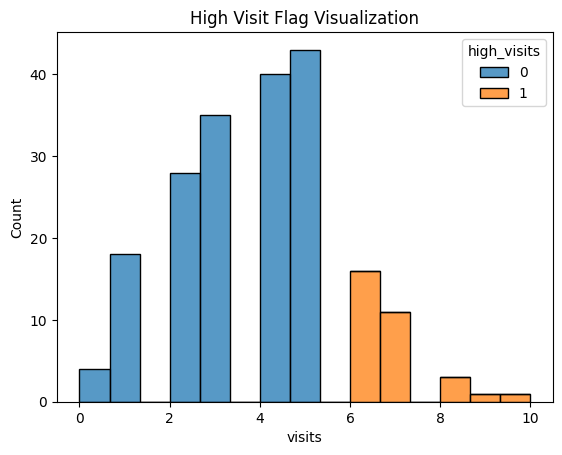

In [17]:
sns.histplot(df, x='visits', hue='high_visits', multiple='stack', bins=15)
plt.title('High Visit Flag Visualization')
plt.show()


Correlation Check

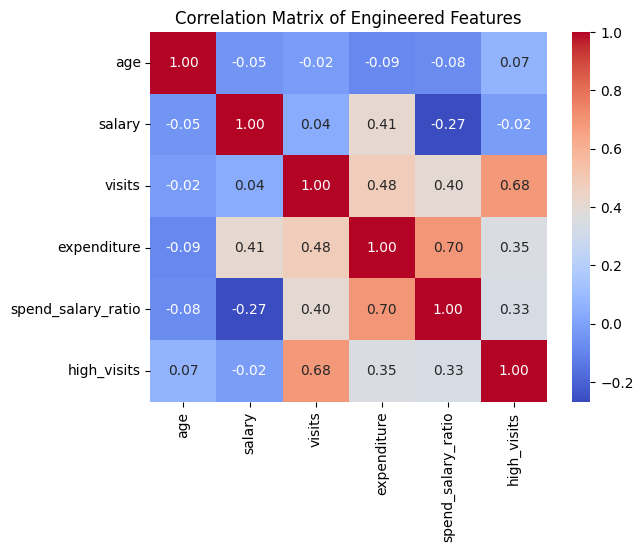

In [18]:
corr = df[['age','salary','visits','expenditure','spend_salary_ratio','high_visits']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Engineered Features')
plt.show()


In [ ]:
df.to_csv('D:/bootcamp_Jinay_Jain/homework/homework9/data/feature_engineered_dataset.csv', index=False)
print("Engineered dataset saved")

Engineered dataset saved
